In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore',category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline

In [2]:
#Importing Machine learning algorithms and essential meathods
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import datasets
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,explained_variance_score
from sklearn.decomposition import PCA

In [3]:
#Importing Deep-leaing essentials
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
#Today, we are goona work on a simple dataset, which are made available by seaborn library.
#The main advantage is that, seaborn datasets doesn't have null values(I beleive)
#Today we will biuld a regression model
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [5]:
#On 30minutes of brainstorming, I setteled with 'diamonds' dataset.But Onplus says "Never Settle"
df = sns.load_dataset(sns.get_dataset_names()[5])

In [6]:
#Usually people tend to use dataframe.head() to get a quick glance of dataset.
#But we will use dataframe.sample() to retrive random instances from dataset.
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
48998,0.71,Fair,H,SI1,65.1,55.0,2049,5.69,5.65,3.69
19576,1.53,Premium,J,VS1,62.8,59.0,8205,7.34,7.31,4.60
41830,0.40,Ideal,E,VS1,61.3,56.0,1252,4.76,4.80,2.93
34260,0.30,Ideal,H,SI1,60.7,56.0,465,4.35,4.37,2.65
19074,1.54,Ideal,I,VS2,60.7,56.0,7848,7.51,7.46,4.54


In [7]:
#'.cloumns' meathod is used to get a list of attributes present in the dataset
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
#The order of the attributes are arbitrarily placed, 
#so we are goona move the featues to the left and ouptut/labels to right side of the dataset
lst = list(df.columns[:6])
lst.extend(list(df.columns[7:]))
lst.append('price')

In [9]:
df = df[lst]

In [10]:
#The attr
df.sample()

,carat,cut,color,clarity,depth,table,x,y,z,price
15580,1.01,Good,E,VS2,60.8,63.0,6.44,6.46,3.92,6250


In [11]:
#Now we are gonna use '.shape' meathod ro find the number of instances and number of attributes
df.shape

(53940, 10)

In [12]:
#'.info()' meathod gives overall information
#(ie no.of rows,coloums_name,dtypes,n0. of null valuse in each) about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   x        53940 non-null  float64 
 7   y        53940 non-null  float64 
 8   z        53940 non-null  float64 
 9   price    53940 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [13]:
#Gives stastical overview of the dataset
#On observation, the average price of a diamond is around 4k dollars.I need to start saving!!!!
#The maximum price of a diamond is 18k dollars!!. I wish someone lost that diamond and I found it.
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# Exploratory data analysis (EDA)

<Axes: >

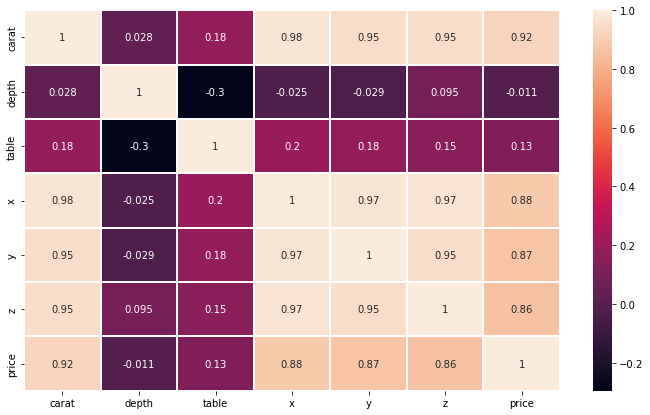

In [14]:
#Now we are gonna find the correlation between the attributes in the data=set.
#Note:".corr()" meathod only works with attributes of datatype, numerical.
#we are gonna use sns.heatmap() for graphical representation of correlations
#correlation gives how 2 attributes are similar to each other in terms of a scalar quantity.
#scalar near to zero means they are less co-related and away from the zero means they are highly corelated
#irrespective to the sign
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [15]:
#As we are more interesed, with the prices.we try to understand its corelation with other attributes
df.corr()['price'].sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

<Axes: >

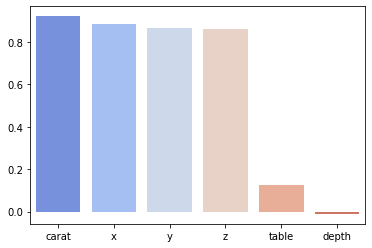

In [16]:
#From the below barplot, it is safe to say that attributes like carat,x,y and z are highly corelated with price
x_axis = df.corr()['price'].sort_values(ascending=False).keys()[1:]
y_axis = df.corr()['price'].sort_values(ascending=False).values[1:]
sns.barplot(x = x_axis,y = y_axis,palette='coolwarm')

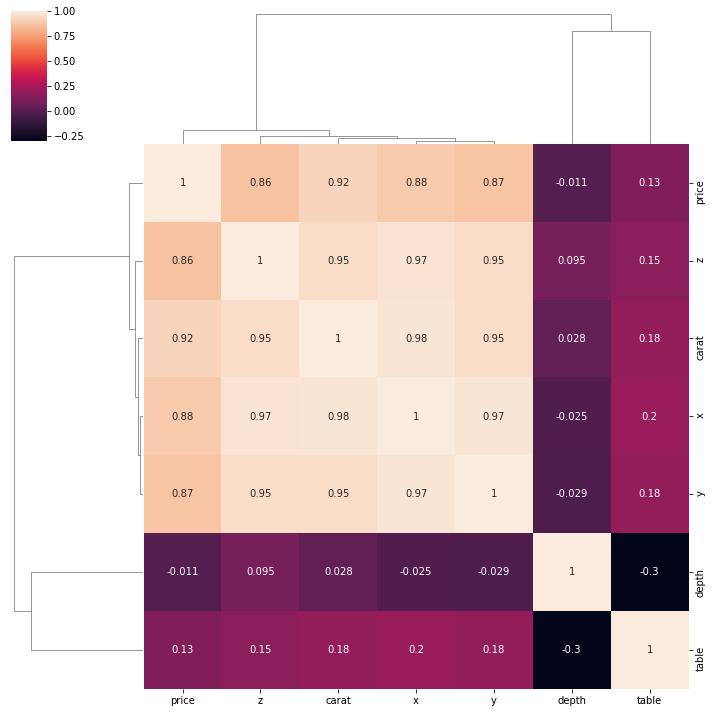

In [17]:
#clustermap help us to sort the correlations
sns.clustermap(df.corr(),annot = True)

In [18]:
#Now we will focus on individual attributes

In [19]:
df.select_dtypes('category').columns

Index(['cut', 'color', 'clarity'], dtype='object')

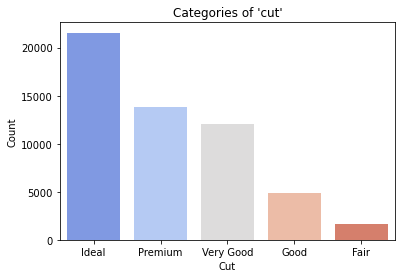

In [20]:
plot = sns.barplot(x = df['cut'].value_counts().keys(), y = df['cut'].value_counts().values,palette='coolwarm')
plot.set(title="Categories of 'cut'")
plot.set_xlabel('Cut')
plot.set_ylabel('Count')
plt.show()

In [21]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

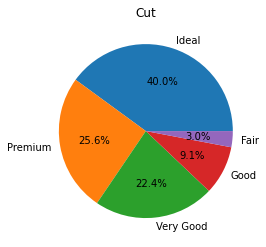

In [22]:
plt.pie(df['cut'].value_counts(),labels=df['cut'].value_counts().keys(),autopct='%0.1f%%')
plt.title('Cut')
plt.show()

<Axes: xlabel='cut', ylabel='price'>

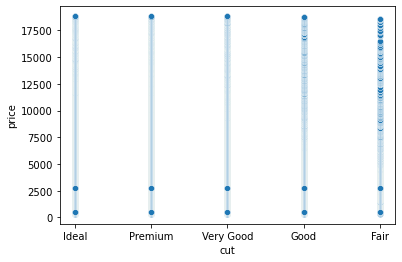

In [23]:
sns.scatterplot(data = df,x = 'cut',y = 'price')

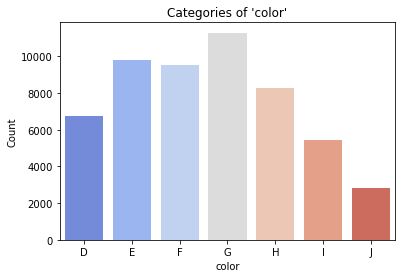

In [24]:
plot = sns.barplot(x = df['color'].value_counts().keys(), y = df['color'].value_counts().values,palette='coolwarm')
plot.set(title="Categories of 'color'")
plot.set_xlabel('color')
plot.set_ylabel('Count')
plt.show()

In [25]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

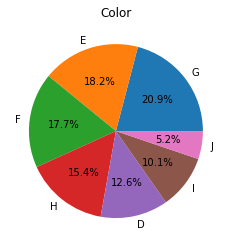

In [26]:
plt.pie(df['color'].value_counts(),labels=df['color'].value_counts().keys(),autopct='%0.1f%%')
plt.title('Color')
plt.show()

<Axes: xlabel='color', ylabel='price'>

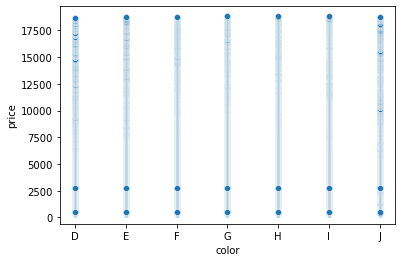

In [27]:
sns.scatterplot(data = df,x = 'color',y = 'price')

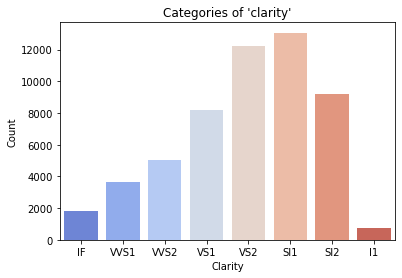

In [28]:
plot = sns.barplot(x = df['clarity'].value_counts().keys(), y = df['clarity'].value_counts().values,palette='coolwarm')
plot.set(title="Categories of 'clarity'")
plot.set_xlabel('Clarity')
plot.set_ylabel('Count')
plt.show()

In [29]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

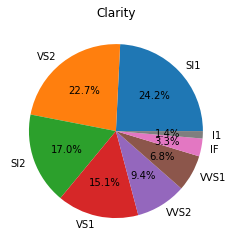

In [30]:
plt.pie(df['clarity'].value_counts(),labels=df['clarity'].value_counts().keys(),autopct='%0.1f%%')
plt.title('Clarity')
plt.show()

<Axes: xlabel='clarity', ylabel='price'>

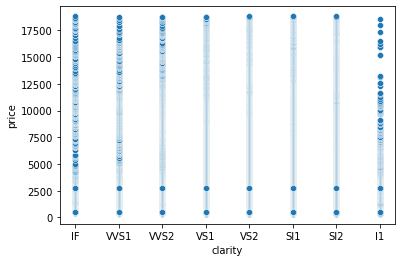

In [31]:
sns.scatterplot(data = df,x = 'clarity',y = 'price')

In [32]:
#From the above scatter plots between price and categorical attributes,
#we can say that prices have very less corelation with clarity,cut and color

# Skewness

In [33]:
lst = df.select_dtypes(['int64','float64']).columns

In [34]:
#skewness helps us to understand the distribution.
#Lesser the value, better the distribution
#POSITIVE SKEWNESS represent that the distribution have outliers on the higher end(right side of the distribution)
#NEGATIVE SKEWNESS represent that the distribution have outliers on the lower end(left side of the distribution)
skewness_dict = {}
for attribute in lst:
    print(f'The skewness of {attribute} is {df[attribute].skew()}')
    skewness_dict[attribute] = df[attribute].skew()

The skewness of carat is 1.116645920812613
The skewness of depth is -0.08229402630189467
The skewness of table is 0.7968958486695427
The skewness of x is 0.3786763426463927
The skewness of y is 2.4341667164885554
The skewness of z is 1.5224225590685583
The skewness of price is 1.618395283383529


In [35]:
#Now we try to visually represent distribution and skewness

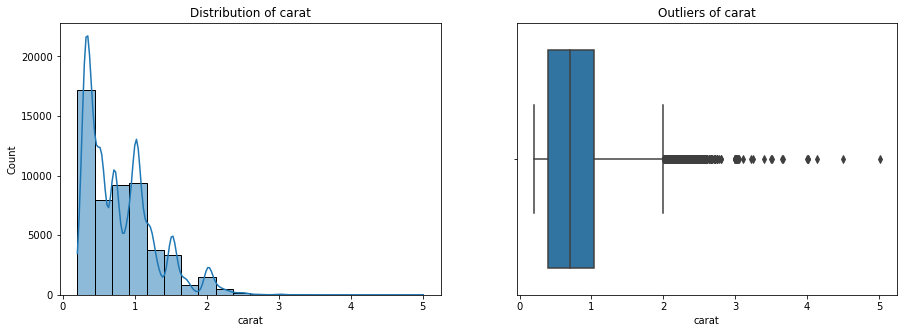

In [36]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[0]],bins = 20,kde = True).set(title = 'Distribution of carat')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[0]]).set(title = 'Outliers of carat')

plt.show()

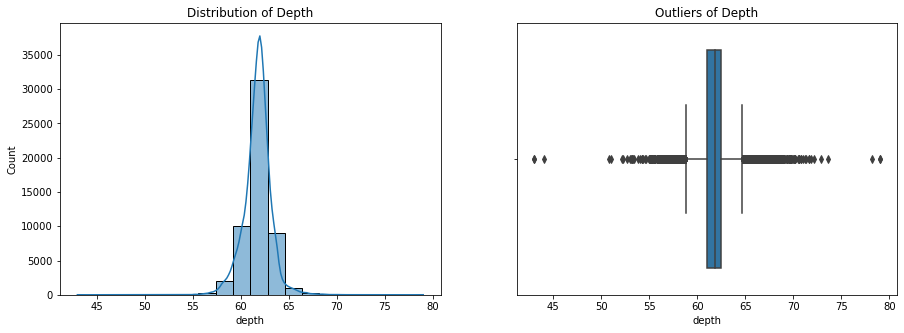

In [37]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[1]],bins = 20,kde = True).set(title = 'Distribution of Depth')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[1]]).set(title = 'Outliers of Depth')

plt.show()

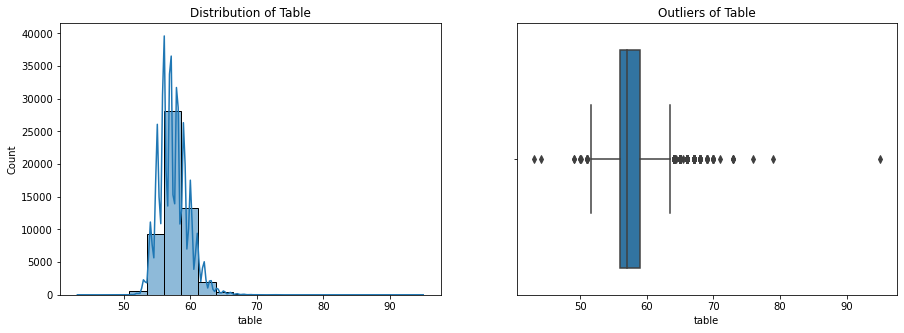

In [38]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[2]],bins = 20,kde = True).set(title = 'Distribution of Table')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[2]]).set(title = 'Outliers of Table')

plt.show()

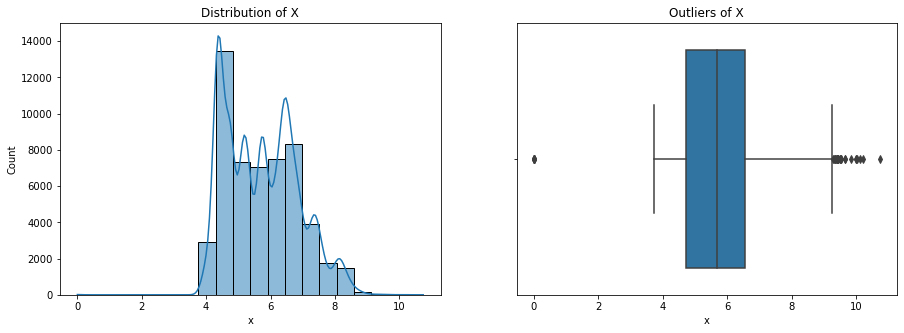

In [39]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[3]],bins = 20,kde = True).set(title = 'Distribution of X')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[3]]).set(title = 'Outliers of X')

plt.show()

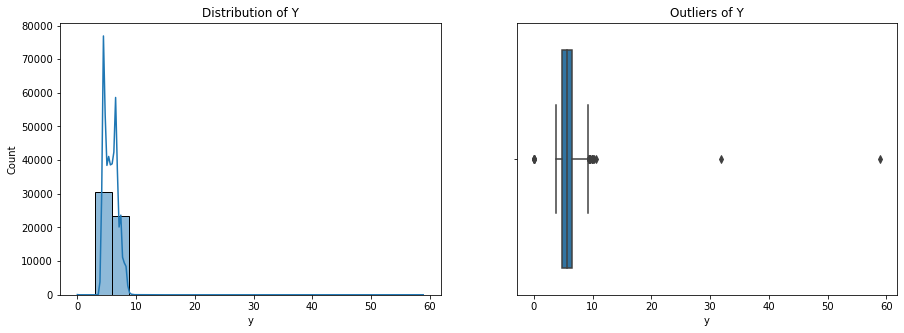

In [40]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[4]],bins = 20,kde = True).set(title = 'Distribution of Y')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[4]]).set(title = 'Outliers of Y')

plt.show()

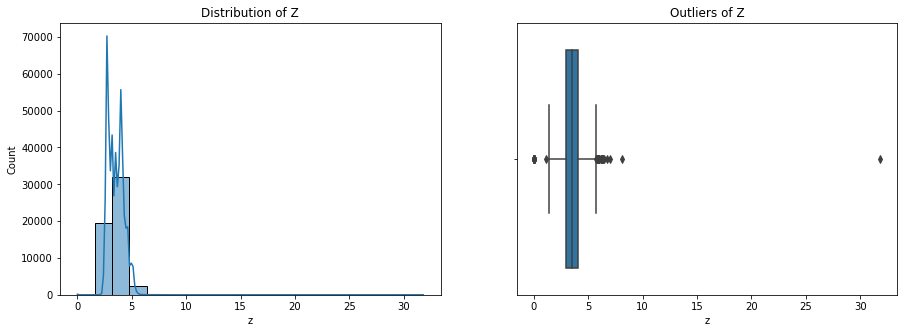

In [41]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[5]],bins = 20,kde = True).set(title = 'Distribution of Z')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[5]]).set(title = 'Outliers of Z')

plt.show()

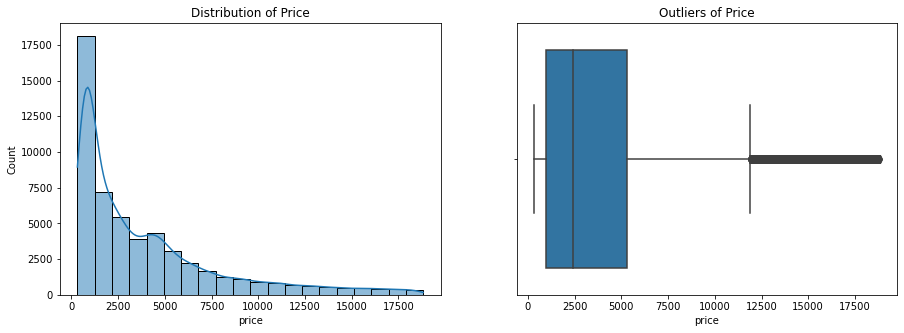

In [42]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(df[lst[6]],bins = 20,kde = True).set(title = 'Distribution of Price')

plt.subplot(1,2,2)
sns.boxplot(x = df[lst[6]]).set(title = 'Outliers of Price')

plt.show()

# Handling outliers

Outliers are like lonewolves who left their pack behind.The lonewolves cannot survive without the pack.Similarly ouliers should bre removed, so that they don't screw your ML model

In [43]:
#On observation
#We can see in the boxplots that the attributes y and Z has outliers(I believe they are typo errors) which can effect our model performance
#The outliers in other attributes are kinda distributed, so we are gonna leave them. we are not satified with the performance then 
#we will remove them too

In [44]:
#Instances before outliers removal
df.shape[0]

53940

In [45]:
#Instances after outliers removal
df = df[(df['y'] < 15) & (df['z'] < 10)]
df = df[(df['carat'] < 2.5) & ((df['table'] < 70) & (df['table'] > 50))]
df = df[(df['x']>2)&(df['x']<10)]
df.shape[0]

53763

In [46]:
100 - (53763/53940)*100

0.3281423804226904

In [47]:
#0.32% instance removed
#177 instances were removed.Even though we removed only 3 instances, 
#I beleive it improves the performance to a great extent

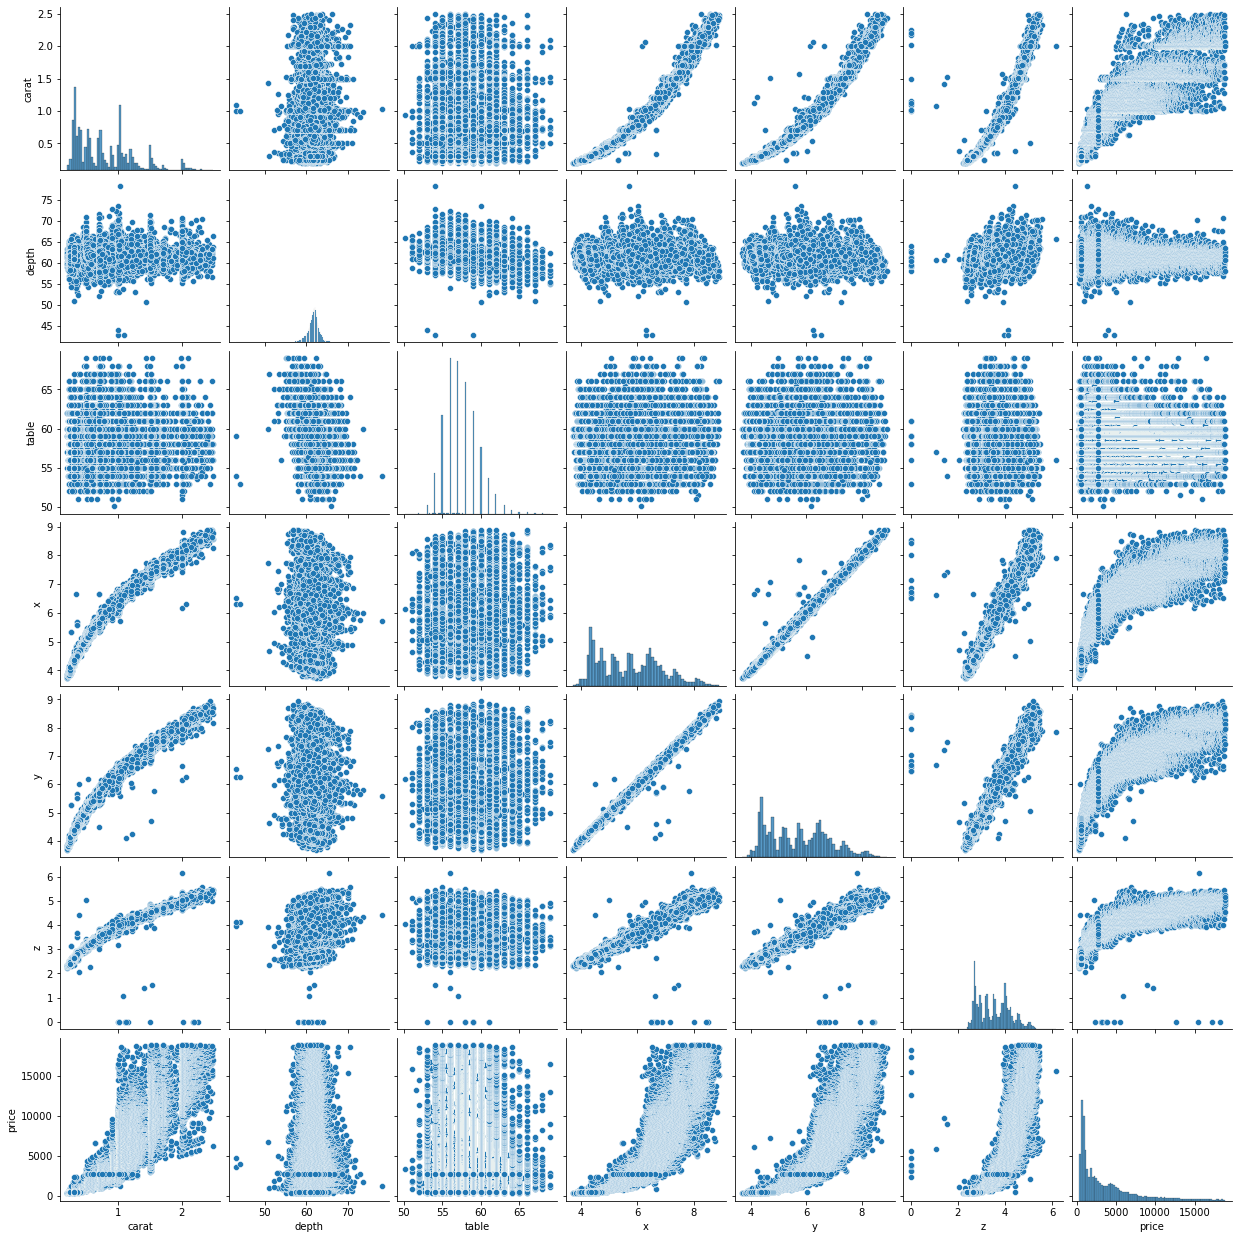

In [48]:
sns.pairplot(df)

In [49]:
#now, we are gonna fit a regression line with the attributes which are highly corelated with 'price'

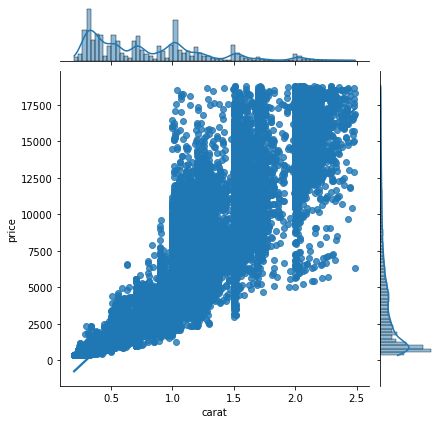

In [50]:
sns.jointplot(data = df,x = 'carat',y = 'price',kind='reg')

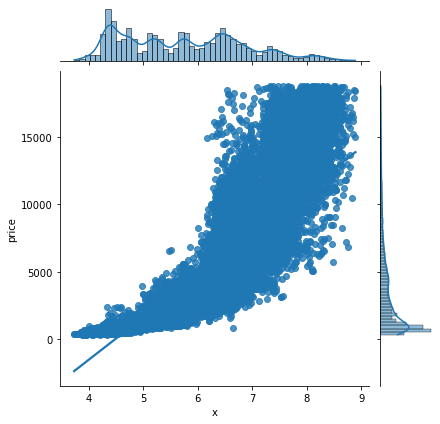

In [51]:
sns.jointplot(data = df,x = 'x',y = 'price',kind='reg')

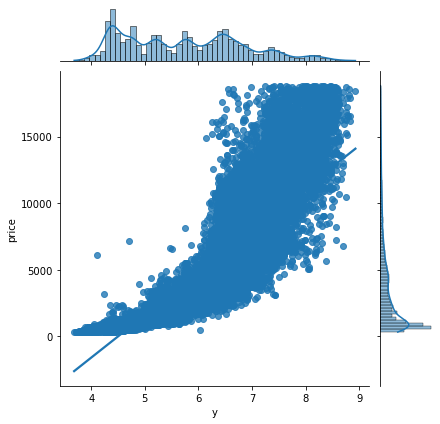

In [52]:
sns.jointplot(data = df,x = 'y',y = 'price',kind='reg')

# Data preprocessing

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53763 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53763 non-null  float64 
 1   cut      53763 non-null  category
 2   color    53763 non-null  category
 3   clarity  53763 non-null  category
 4   depth    53763 non-null  float64 
 5   table    53763 non-null  float64 
 6   x        53763 non-null  float64 
 7   y        53763 non-null  float64 
 8   z        53763 non-null  float64 
 9   price    53763 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [54]:
df.select_dtypes('category').columns

Index(['cut', 'color', 'clarity'], dtype='object')

In [55]:
#Machine learning models are incapabale of hadling text/categorical data. So we need to tranform them into vectors
#using pd.getdummies() functionality

In [56]:
#Before converting them into vectors, let us find the number of categories in each attribute

In [57]:
for att in df.select_dtypes('category').columns:
    print(f'The number of categories in attribute {att} are {df[att].nunique()}')

The number of categories in attribute cut are 5
The number of categories in attribute color are 7
The number of categories in attribute clarity are 8


In [58]:
df_cut = pd.get_dummies(df['cut'],drop_first=True)
df_color = pd.get_dummies(df['color'],drop_first=True)
df_clarity = pd.get_dummies(df['clarity'],drop_first=True)

In [59]:
df = pd.concat([df_cut,df_color,df_clarity,df],axis = 1)

In [60]:
df.sample()

,Premium,Very Good,Good,Fair,E,F,G,H,I,J,...,carat,cut,color,clarity,depth,table,x,y,z,price
9857,1,0,0,0,0,1,0,0,0,0,...,1.02,Premium,F,SI1,63.0,58.0,6.4,6.36,4.02,4678


In [61]:
df.drop(['cut','color','clarity'],axis = 1,inplace = True)

In [62]:
df.sample()

,Premium,Very Good,Good,Fair,E,F,G,H,I,J,...,SI1,SI2,I1,carat,depth,table,x,y,z,price
47854,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0.51,60.1,57.0,5.23,5.19,3.13,1909


# Splitting Data

In [63]:
X = df.drop(['price'],axis = 1)
y = df['price']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Standardizing variables

In [65]:
scalar = MinMaxScaler()

In [66]:
X_train = scalar.fit_transform(X_train)

In [67]:
X_test = scalar.transform(X_test)

# Machine learning Models

# Linera Regression

In [68]:
#Fitting model
lr = LinearRegression()
lr.fit(X_train,y_train)

#Predictions
lr_pred = lr.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test,lr_pred)
r2 = r2_score(y_test,lr_pred)
accuracy = lr.score(X_test,y_test)
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

#Linear regression Parameters
coef = list(lr.coef_)
inter = lr.intercept_


print("Model:Linear Regression\n")
print("*"*5+"Parameters"+"*"*5)
print(f"Coefficients : {coef}")
print(f"Intercet : {inter}\n")
print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:Linear Regression

*****Parameters*****
Coefficients : [-47.57024470004003, -122.60681975333864, -235.095009646426, -723.2268638748595, -207.96305891279764, -268.13745935568954, -480.6552140379018, -993.6465330291499, -1502.1952439497672, -2387.93410909773, -327.8925289352167, -360.7979647918058, -720.8870467292713, -1027.3068694216583, -1620.0460190595716, -2588.545302364224, -4834.28224800587, 29535.9890267629, -2664.824979448482, -552.296810778242, -11929.353354930963, 4203.038223127774, -1411.134439973826]
Intercet : 3742.5060168482646

*****Performance metrics*****
Accuracy : 0.9254749202062776
Mean absolute error : 713.9424975651884
Mean squared error : 1165019.386280198
Root mean squared error : 1079.3606377296692
R2_score : 0.9254749202062776
Adjusted R2_score : 0.9253684888597855


<Axes: xlabel='price'>

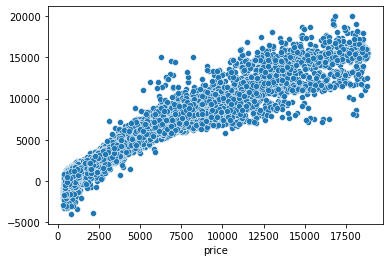

In [69]:
sns.scatterplot(x = y_test,y = lr_pred)

In [70]:
residual = y_test-lr_pred

<Axes: ylabel='price'>

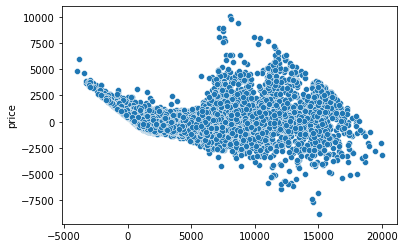

In [71]:
sns.scatterplot(y = residual,x = lr_pred)

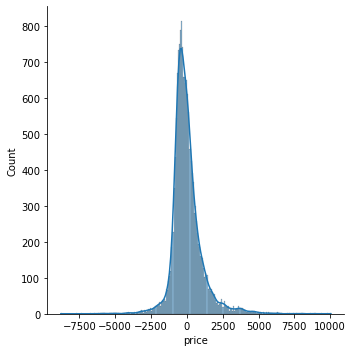

In [72]:
sns.displot(x = residual,kde = True)

# KNearest neighbour (Regression)

In [73]:
#Fitting model
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

#Predictions
knn_pred = knn.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test,knn_pred)
r2 = r2_score(y_test,knn_pred)
accuracy = knn.score(X_test,y_test)
mse = mean_squared_error(y_test,knn_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Model:KNearest Neighbour(Regression)\n")
print("*"*5+"Parameters"+"*"*5)
print(f"Neighbours : 5\n")
print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:KNearest Neighbour(Regression)

*****Parameters*****
Neighbours : 5

*****Performance metrics*****
Accuracy : 0.9650496639283215
Mean absolute error : 360.16180792361587
Mean squared error : 546363.9783173166
Root mean squared error : 739.1643784147858
R2_score : 0.9650496639283215
Adjusted R2_score : 0.9649997503778931


<Axes: xlabel='price'>

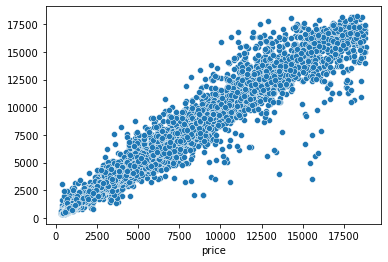

In [74]:
sns.scatterplot(x = y_test,y = knn_pred)

<Axes: ylabel='price'>

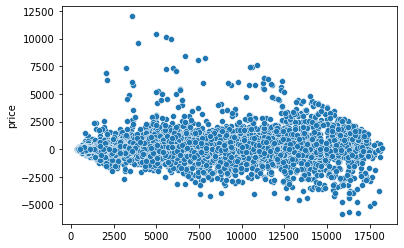

In [75]:
residual = y_test-knn_pred
sns.scatterplot(y = residual,x = knn_pred)

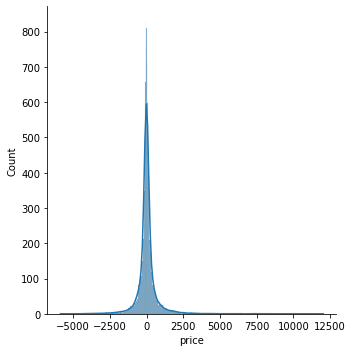

In [76]:
sns.displot(x = residual,kde = True)

Tuning Hyperparameters

In [77]:
score_lst = []
for n in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train,y_train)
    print(n,knn.score(X_test,y_test))
    score_lst.append(knn.score(X_test,y_test))

1 0.9586380468841196
2 0.966181815356964
3 0.9663469942882524
4 0.9663656846804831
5 0.9650496639283215
6 0.9630061207124436
7 0.9608914000165919
8 0.9591832158492336
9 0.9568650869620339
10 0.9547080061875166
11 0.9525444032411102
12 0.9501637985615206
13 0.947861835071351
14 0.9454576631090933
15 0.9432451796011587
16 0.9408583749410435
17 0.9382450437220948
18 0.935924678828428
19 0.9336129911258333


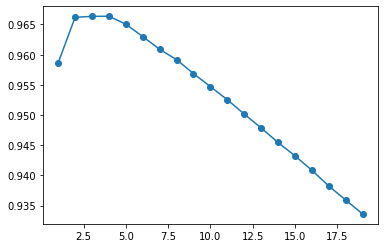

In [78]:
plt.plot(range(1,20),score_lst,marker = 'o')

In [79]:
#There at n = 4, we are getting highest score

In [80]:
#Fitting model
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

#Predictions
knn_pred = knn.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test,knn_pred)
r2 = r2_score(y_test,knn_pred)
accuracy = knn.score(X_test,y_test)
mse = mean_squared_error(y_test,knn_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Model:KNearest Neighbour(Regression)\n")
print("*"*5+"Parameters"+"*"*5)
print(f"Neighbours : 5\n")
print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:KNearest Neighbour(Regression)

*****Parameters*****
Neighbours : 5

*****Performance metrics*****
Accuracy : 0.9663656846804831
Mean absolute error : 358.0225990451981
Mean squared error : 525791.1766073533
Root mean squared error : 725.1145955001549
R2_score : 0.9663656846804831
Adjusted R2_score : 0.9663176505760218


# Decision Tree (Regression)

In [81]:
#Fitting model
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

#Predictions
dt_pred = dt.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test,dt_pred)
r2 = r2_score(y_test,dt_pred)
accuracy = dt.score(X_test,y_test)
mse = mean_squared_error(y_test,dt_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Model:Linear Regression\n")

print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:Linear Regression

*****Performance metrics*****
Accuracy : 0.9664761171865169
Mean absolute error : 361.5594271188542
Mean squared error : 524064.8314526629
Root mean squared error : 723.9232220703125
R2_score : 0.9664761171865169
Adjusted R2_score : 0.9664282407937997


<Axes: xlabel='price'>

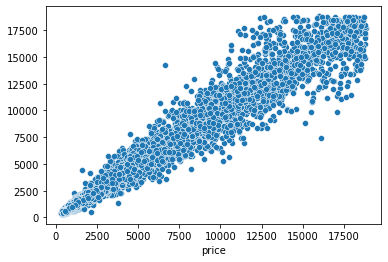

In [82]:
sns.scatterplot(x = y_test,y = dt_pred)

<Axes: ylabel='price'>

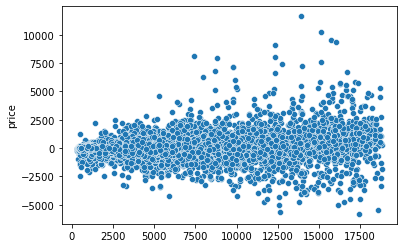

In [83]:
residual = y_test-knn_pred
sns.scatterplot(y = residual,x = dt_pred)

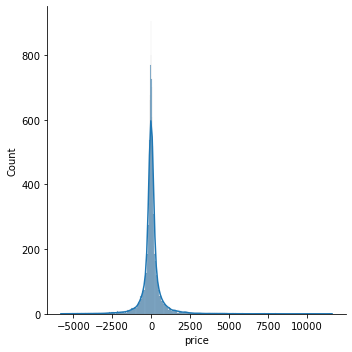

In [84]:
sns.displot(x = residual,kde = True)

# Random Forests(Regression)

In [85]:
#Fitting model
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

#Predictions
rfr_pred = rfr.predict(X_test)

#Performance metrics
mae = mean_absolute_error(y_test,rfr_pred)
r2 = r2_score(y_test,rfr_pred)
accuracy = rfr.score(X_test,y_test)
mse = mean_squared_error(y_test,rfr_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Model:Random Forest (Regression)\n")

print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:Random Forest (Regression)

*****Performance metrics*****
Accuracy : 0.9813912530335545
Mean absolute error : 273.5672420049364
Mean squared error : 290902.75421775685
Root mean squared error : 539.3540156685189
R2_score : 0.9813912530335545
Adjusted R2_score : 0.9813646773626307


<Axes: xlabel='price'>

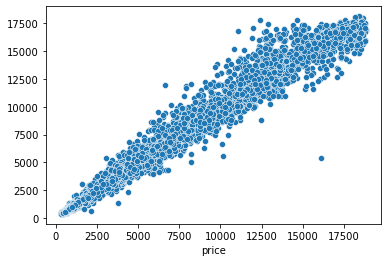

In [86]:
sns.scatterplot(x = y_test,y = rfr_pred)

<Axes: ylabel='price'>

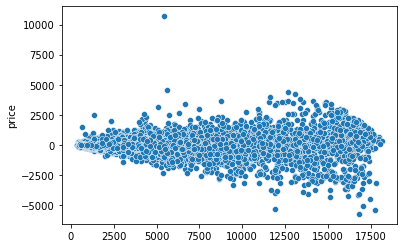

In [87]:
residual = y_test-rfr_pred
sns.scatterplot(y = residual,x = rfr_pred)

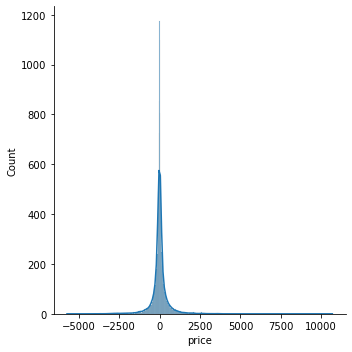

In [88]:
sns.displot(x = residual,kde = True)

# Deep Learning

In [93]:
model = Sequential()

In [94]:
X_train.shape

(37634, 23)

In [95]:
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss = 'mse')

In [96]:
model.fit(X_train,y_train,batch_size=128,epochs=600,verbose=0)

<Axes: >

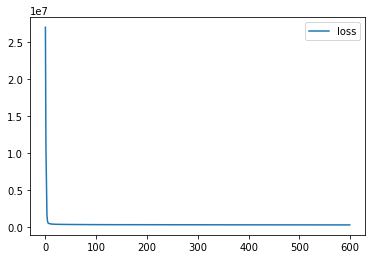

In [97]:
pd.DataFrame(model.history.history).plot()

In [98]:
dl_pred = model(X_test)

In [99]:
explained_variance_score(y_test,dl_pred)

0.9808105487889093

In [100]:
#Performance metrics
mae = mean_absolute_error(y_test,dl_pred)
r2 = r2_score(y_test,dl_pred)
accuracy = explained_variance_score(y_test,dl_pred)
mse = mean_squared_error(y_test,dl_pred)
rmse = np.sqrt(mse)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


print("Model:Deep Learing\n")

print("*"*5+"Performance metrics"+"*"*5)
print(f"Accuracy : {accuracy}")
print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"Root mean squared error : {rmse}")
print(f"R2_score : {r2}")
print(f"Adjusted R2_score : {adjusted_r2}")

Model:Deep Learing

*****Performance metrics*****
Accuracy : 0.9808105487889093
Mean absolute error : 297.42058916155185
Mean squared error : 301864.6349102137
Root mean squared error : 549.4220917566145
R2_score : 0.9806900329140309
Adjusted R2_score : 0.9806624558110829


# By Sarath Rahul Malla